# Binary Classification Task

Logistic regression as a foundation for classification, by taking our probability outputs and applying 
a fixed threshold to them.

In this notebook, Logistic regression is used to estimate the posterior probabilities of each class.

The model must predict label that belongs to one two classes.

The training of a binary classifier to predict the probability of customer contract a new product.

The probability estimates is  useful for gauging the model's confidence about the predicted classification. 

In [1]:
import pandas as pd
import numpy as np
import graphing
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

## Model and Notation

Logistic regression , the outcome variable Yi follows Bernoulli probability function that takes on the value 1 with probability πi and 0 with probability 1-πi. Then πi varies over the observations as an inverse logistic function of a vector xi, which includes a constant and k-1 explanatory variables:

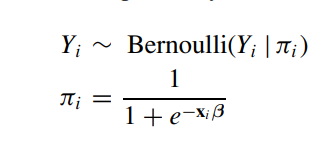

In [2]:
img01 = Image.open('../image/image01.png')
img01.show()

The alternative way to define the same model

These unobserved continuos variables Yi* would be dichotomous.

Thus, measuring the probability of customer contract a new product, Yi might be contracted(1) or not_contrated(0).

source: https://gking.harvard.edu/files/abs/0s-abs.shtml

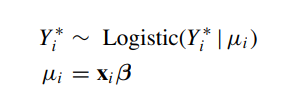

In [3]:
img02 = Image.open('../image/image02.png')
img02.show()

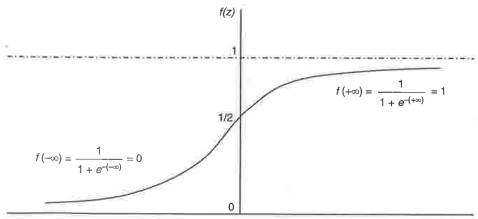

In [4]:
#Logistic function
img03 = Image.open('../image/image03.png')
img03.show()

In [5]:
metadata = pd.read_csv('../data/metadata.csv')
df = pd.read_csv('../data/train.csv')

In [6]:
metadata.sample(n=7)

,Variavel cod,Variavel tipo
19,var19,Qualitativo nominal
14,var14,Qualitativo nominal
24,var24,Quantitativo discreto
8,var8,Qualitativo nominal
34,var34,Qualitativo nominal
31,var31,Qualitativo nominal
55,var55,Quantitativo continua


In [7]:
#Selecting discrete quantitative variables
metadata[metadata['Variavel tipo']=='Qualitativo nominal'].T

,0,1,2,3,4,5,6,7,8,9,...,30,31,33,34,35,36,37,38,39,41
Variavel cod,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var30,var31,var33,var34,var35,var36,var37,var38,var39,var41
Variavel tipo,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,...,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal,Qualitativo nominal


In [8]:
nominal = list(metadata[metadata['Variavel tipo']=='Qualitativo nominal']['Variavel cod'])

In [9]:
df_nominal_variable = df[nominal]

In [10]:
#Selecting discrete quantitative variables
metadata[metadata['Variavel tipo']=='Quantitativo discreto'].T

,24,25,27,40,44,45,46,47,48,49,50,51,52,53,54,67,68,69
Variavel cod,var24,var25,var27,var40,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var67,var68,y
Variavel tipo,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto,Quantitativo discreto


In [11]:
discreta = list(metadata[metadata['Variavel tipo']=='Quantitativo discreto']['Variavel cod'])

In [12]:
df_discrete_variable = df[discreta]

In [13]:
df_discrete_variable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14123 entries, 0 to 14122
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var24   14123 non-null  int64  
 1   var25   14123 non-null  int64  
 2   var27   14123 non-null  int64  
 3   var40   14123 non-null  int64  
 4   var44   14123 non-null  int64  
 5   var45   14123 non-null  int64  
 6   var46   14123 non-null  int64  
 7   var47   14123 non-null  int64  
 8   var48   14123 non-null  int64  
 9   var49   14123 non-null  int64  
 10  var50   14123 non-null  int64  
 11  var51   14123 non-null  int64  
 12  var52   14123 non-null  int64  
 13  var53   14123 non-null  int64  
 14  var54   14123 non-null  int64  
 15  var67   14123 non-null  float64
 16  var68   14123 non-null  float64
 17  y       14123 non-null  int64  
dtypes: float64(2), int64(16)
memory usage: 1.9 MB


In [14]:
metadata[metadata['Variavel tipo']=='Quantitativo continua'].T

,55,56,57,58,59,60,61,62,63,64,65,66
Variavel cod,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66
Variavel tipo,Quantitativo continua,Quantitativo continua,Quantitativo continua,Quantitativo continua,Quantitativo continua,Quantitativo continua,Quantitativo continua,Quantitativo continua,Quantitativo continua,Quantitativo continua,Quantitativo continua,Quantitativo continua


In [15]:
#Selecting continuos variables
continuos = list(metadata[metadata['Variavel tipo']=='Quantitativo continua']['Variavel cod'])

In [16]:
df_continuos_variables = df[continuos]

In [17]:
df_continuos_variables.head()

,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66
0,0.212414,0.137,0.833333,0.037822,0.058070,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603
1,0.228784,0.308,0.305376,0.069325,0.248909,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000
2,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000
3,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201
4,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000


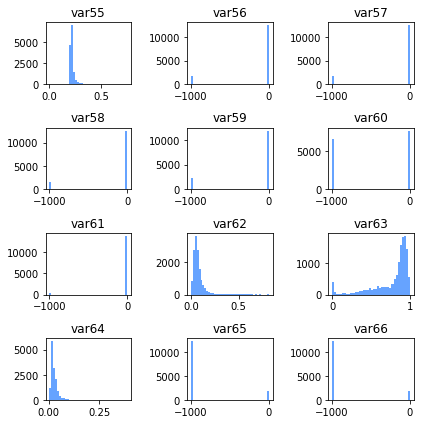

In [18]:
#Histogram of continuos variables
df_continuos_variables.loc[:,['var55','var56','var57','var58','var59','var60',
                              'var61','var62','var63','var64','var65','var66']
                ].hist(grid=False, 
                bins=40, 
                figsize=(6,6),
                facecolor='#66a3ff')

plt.tight_layout()
plt.show()

In [19]:
df2 = df.loc[:,['var55','var62','var63','var64','y']]

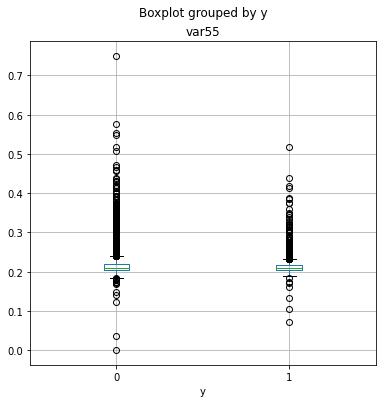

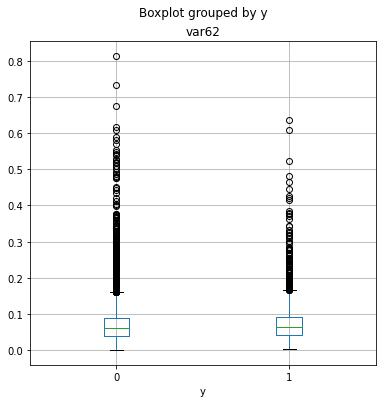

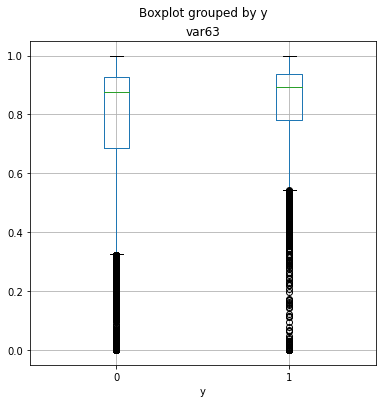

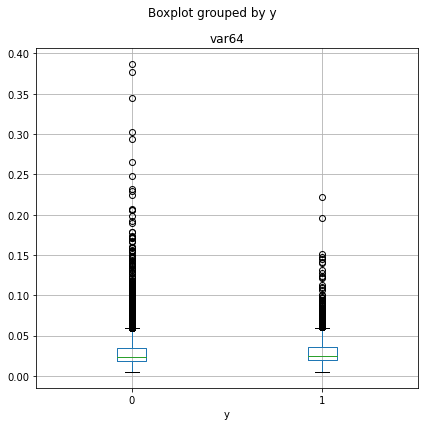

In [20]:
inputs = ['var55','var62','var63','var64']
for col in inputs:
    df2.boxplot(column=col, by='y', figsize=(6,6))
    plt.title(col)
plt.tight_layout()
plt.show()

In [21]:
#Defining X and y
features = ['var9','var22','var23','var24', 
            'var25','var27','var40', 'var44',
            'var45','var46','var47','var48',
            'var49','var50','var51', 'var52',
            'var53','var54','var55','var62',
            'var63','var64','var67','var68']
X = df[features]
y = df.y

In [22]:
smote= SMOTE(random_state=1234)

In [23]:
X, y = smote.fit_resample(X, y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
print(X_train.shape)
print(X_test.shape)

(15782, 24)
(6764, 24)


In [25]:
model_logistic01 = smf.logit(formula='y_train ~ var63', data=X_train).fit()  

Optimization terminated successfully.
         Current function value: 0.688801
         Iterations 4


In [26]:
print(model_logistic01.summary())

                           Logit Regression Results                           
Dep. Variable:                y_train   No. Observations:                15782
Model:                          Logit   Df Residuals:                    15780
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Dec 2021   Pseudo R-squ.:                0.006244
Time:                        09:40:48   Log-Likelihood:                -10871.
converged:                       True   LL-Null:                       -10939.
Covariance Type:            nonrobust   LLR p-value:                 1.469e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6893      0.063    -10.930      0.000      -0.813      -0.566
var63          0.8843      0.077     11.531      0.000       0.734       1.035


In [27]:
samples = X_test['var63'][:15]

estimate_probabilities = model_logistic01.predict(samples)

for sample, pred in zip(samples,estimate_probabilities):
    print(f'The Feature var63 with value {sample} yields a {pred * 100:.2f}% chance for the customer contract a new product.')

The Feature var63 with value 0.9428322907845206 yields a 53.61% chance for the customer contract a new product.
The Feature var63 with value 0.93844601412714 yields a 53.51% chance for the customer contract a new product.
The Feature var63 with value 0.8710619947162803 yields a 52.02% chance for the customer contract a new product.
The Feature var63 with value 0.9424849620961782 yields a 53.60% chance for the customer contract a new product.
The Feature var63 with value 0.9120619827602912 yields a 52.93% chance for the customer contract a new product.
The Feature var63 with value 0.83451059535822 yields a 51.22% chance for the customer contract a new product.
The Feature var63 with value 0.93037336024217 yields a 53.33% chance for the customer contract a new product.
The Feature var63 with value 0.88294651866801 yields a 52.29% chance for the customer contract a new product.
The Feature var63 with value 0.9381798579299293 yields a 53.50% chance for the customer contract a new product.


Classification of data requires thresholding, which defines probability intervals for each class

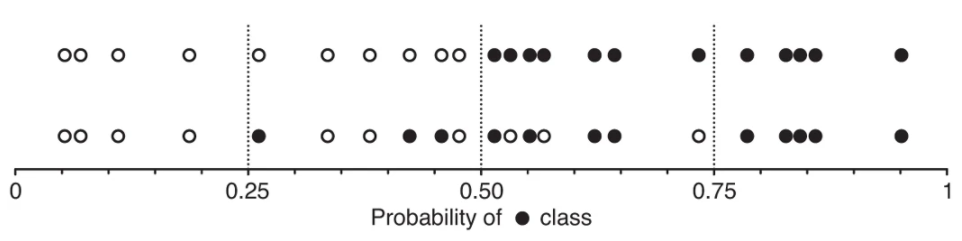

In [28]:
img04 = Image.open('../image/image04.png')
img04.show()

In [29]:
#Defining cut off point
threshold = 0.5

for sample, pred in list(zip(samples,estimate_probabilities)):
    print(f"Feature var63 with value {sample} yields a chance of {pred * 100:.2f}% chance for the customer contract a new product. Classification = {pred > threshold}")

Feature var63 with value 0.9428322907845206 yields a chance of 53.61% chance for the customer contract a new product. Classification = True
Feature var63 with value 0.93844601412714 yields a chance of 53.51% chance for the customer contract a new product. Classification = True
Feature var63 with value 0.8710619947162803 yields a chance of 52.02% chance for the customer contract a new product. Classification = True
Feature var63 with value 0.9424849620961782 yields a chance of 53.60% chance for the customer contract a new product. Classification = True
Feature var63 with value 0.9120619827602912 yields a chance of 52.93% chance for the customer contract a new product. Classification = True
Feature var63 with value 0.83451059535822 yields a chance of 51.22% chance for the customer contract a new product. Classification = True
Feature var63 with value 0.93037336024217 yields a chance of 53.33% chance for the customer contract a new product. Classification = True
Feature var63 with value 0

In [30]:
predict = lambda x: model_logistic01.predict(pd.DataFrame({"var63": x}))

graphing.line_2D([("Model", predict)],
                 x_range=[-20,40],
                 label_x="var63", 
                 label_y="estimated probability")

In [31]:
model_log_reg02 = smf.logit(formula='y_train ~ C(var9) + var22 + var27 + var40 + var44 + var45 + var51 + var52 + var53 + var62 + var63 + var64', data=X_train).fit()

Optimization terminated successfully.
         Current function value: 0.640908
         Iterations 5


In [32]:
print(model_log_reg02.summary())

                           Logit Regression Results                           
Dep. Variable:                y_train   No. Observations:                15782
Model:                          Logit   Df Residuals:                    15767
Method:                           MLE   Df Model:                           14
Date:                Thu, 02 Dec 2021   Pseudo R-squ.:                 0.07534
Time:                        09:40:49   Log-Likelihood:                -10115.
converged:                       True   LL-Null:                       -10939.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -9.6491      1.286     -7.502      0.000     -12.170      -7.128
C(var9)[T.1]    10.8144      1.319      8.202      0.000       8.230      13.399
C(var9)[T.2]    12.1888      1.324      9.20

In [33]:

model_log_reg03 = smf.logit(formula='y_train ~ (var9) + var22 + var27 + var44 + var45 + var51 + var52 + var53 + var63',data=X_train).fit()

Optimization terminated successfully.
         Current function value: 0.649399
         Iterations 5


In [34]:
print(model_log_reg03.summary())

                           Logit Regression Results                           
Dep. Variable:                y_train   No. Observations:                15782
Model:                          Logit   Df Residuals:                    15772
Method:                           MLE   Df Model:                            9
Date:                Thu, 02 Dec 2021   Pseudo R-squ.:                 0.06309
Time:                        09:40:50   Log-Likelihood:                -10249.
converged:                       True   LL-Null:                       -10939.
Covariance Type:            nonrobust   LLR p-value:                1.406e-291
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3971      0.106     13.198      0.000       1.190       1.605
var9           0.0108      0.001      8.337      0.000       0.008       0.013
var22          0.0278      0.010      2.870      0.0

In [35]:
y_predictions = model_log_reg03.predict(X_test)

In [36]:
print("Log loss", log_loss(y_test, y_predictions))

Log loss 0.6496267267309384


In [37]:
predictions = model_log_reg03.predict(X_test) > 0.5

accuracy = np.average(predictions == y_test)

print(f"The model correctly predicted outcomes {accuracy * 100:.2f}% of time.")

The model correctly predicted outcomes 62.36% of time.


References

Gary King and Langche Zeng. 2001. “Logistic Regression in Rare Events Data.” Political Analysis, 9, Pp. 137–163.

https://docs.microsoft.com/en-us/learn/

https://www.nature.com/articles/nmeth.3904